In [1]:
import multiprocessing as mp
mp.set_start_method('spawn', force = True)
import shelve
import pandas as pd
import numpy as np
import lightgbm as lgb
import shap
import concurrent.futures

shap.initjs()

In [11]:
filename='/u/scratch/s/seanchea/u_models_up/99/python/saveData'
my_shelf = shelve.open(filename)
for key in my_shelf:
    globals()[key]=my_shelf[key]
my_shelf.close()

In [3]:
pos = int(allInteractions.shape[0]/2)

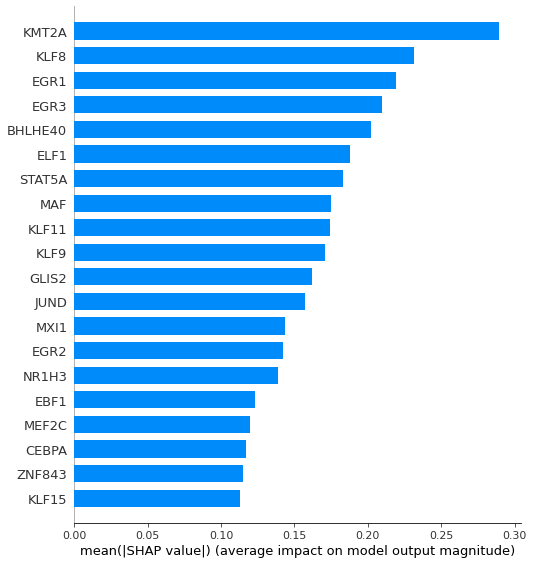

In [5]:
shap.summary_plot(shap_values[1], features = X, feature_names = features, plot_type="bar")

In [23]:
umax = pd.read_csv("/u/home/s/seanchea/plots/umax.txt", sep = ",", header = None)

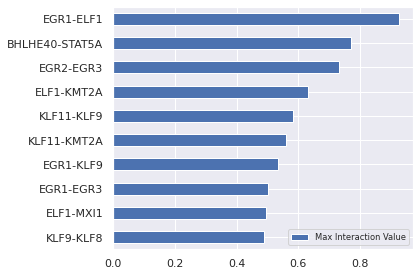

In [36]:
import matplotlib.pyplot as plt
iVals = []
name = []
for i in range(umax.shape[0]):
    for j in range(i, umax.shape[1]):
        iVals.append(umax.iloc[i,j])
        if i != j:
            name.append(features[i] + "-" + features[j])
        else:
            name.append(features[i])
    unrolled = pd.DataFrame({"Max Interaction Value": iVals})
    unrolled.index = name
    top = unrolled.sort_values(by="Max Interaction Value")[-10:]
ax = top.plot.barh()
ax.legend(loc="lower right", fontsize="x-small")
fig = ax.get_figure()
plt.tight_layout()
fig.savefig(f"/u/home/s/seanchea/plots/umax_bar.svg", dpi = 1200)

In [21]:
coMat.iloc[21:30,0]

21     TOP2A
22    KNSTRN
23      ASPM
24      FMOD
25      DPP4
26     UBE2C
27     MKI67
28     SYNJ2
29      OSR2
Name: Unnamed: 0, dtype: object

In [19]:
shap.force_plot(explainer.expected_value[1], shap_values[1][29,:], X.iloc[29,:])

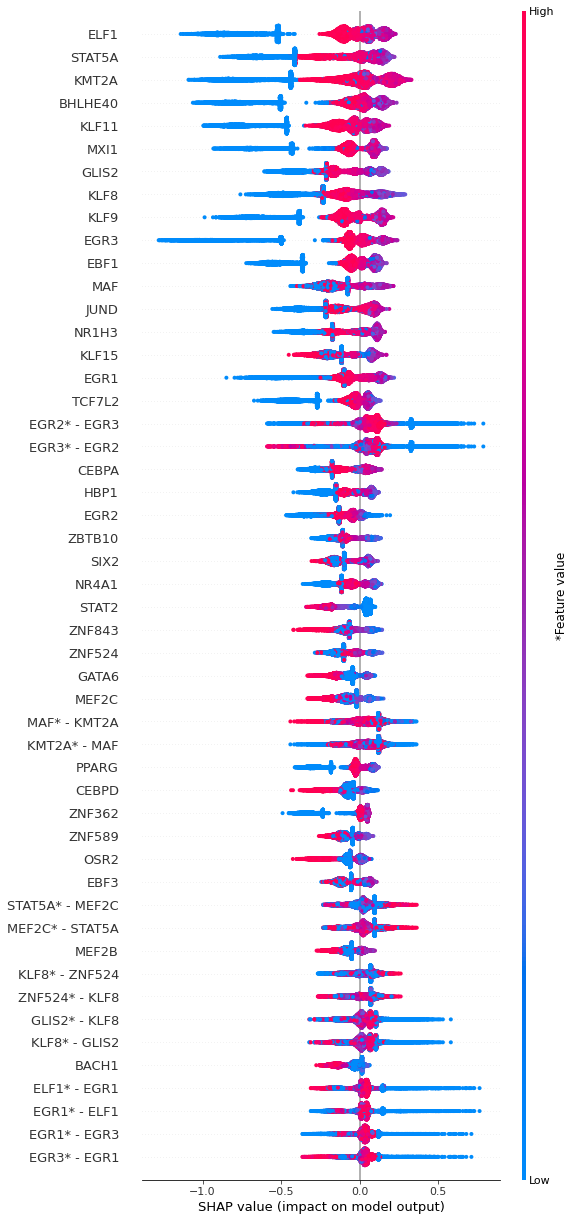

In [6]:
shap.summary_plot(allInteractions, features=X, max_display = 50, plot_type = "compact_dot")

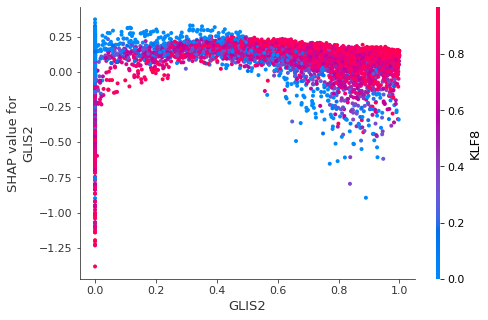

In [7]:
shap.dependence_plot("GLIS2", shap_values[1][0:int(pos),:], X.iloc[0:int(pos),:])

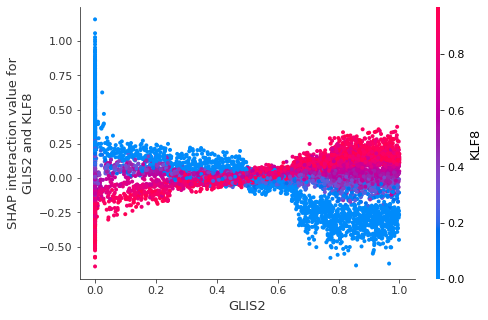

In [8]:
shap.dependence_plot(["GLIS2", "KLF8"], allInteractions, X)

In [9]:
avg = np.mean(allInteractions[:pos,:,:], axis=0)
import scipy as sc
clust = sc.cluster.hierarchy.fclusterdata(avg, 0.01, criterion="distance", method="average")
pruned = avg[(clust!=1), :]
pruned = pruned[:, (clust!=1)]
from itertools import compress
pruned_features = list(compress(features, clust!=1))
len(pruned_features)

54

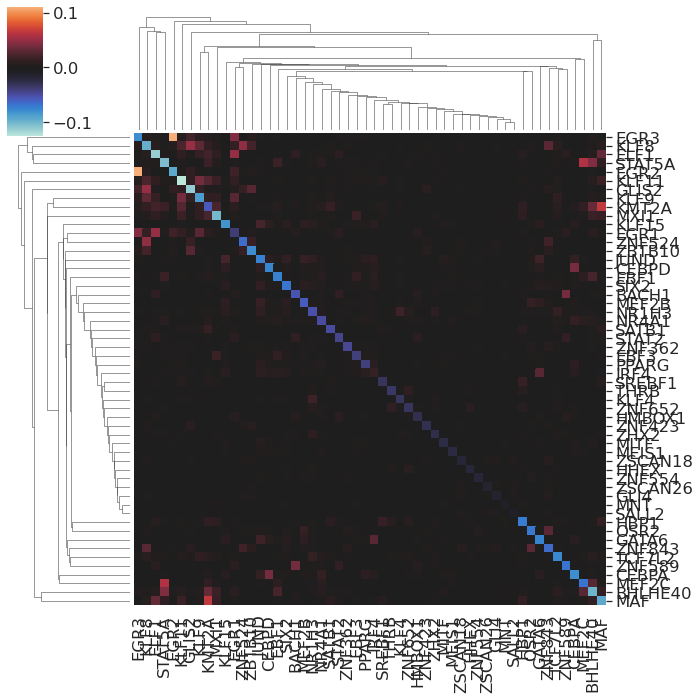

In [10]:
import seaborn as sns
import matplotlib.pylab as plt
sns.set(font_scale=1.5)
ax = sns.clustermap(pruned, method="ward", center=0, xticklabels=pruned_features, yticklabels=pruned_features, square=True)
plt.show()

In [12]:
avg = np.mean(shap_values[1][:pos,:], axis=0)

&lt;matplotlib.axes._subplots.AxesSubplot at 0x7f3d8433a8e0&gt;

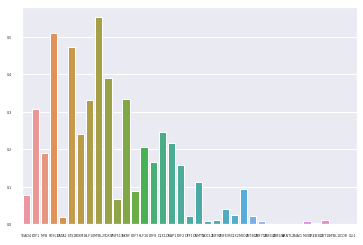

In [16]:
sns.set(font_scale=0.3)
sns.barplot(features, avg)

In [11]:
filename='/u/scratch/s/seanchea/u_models_up/' + str(0) + '/python/saveData'
my_shelf = shelve.open(filename)
for key in my_shelf:
    globals()[key]=my_shelf[key]
my_shelf.close()
avg = np.mean(allInteractions[:pos, :, :], axis=0)
for i in range(99):
    filename='/u/scratch/s/seanchea/u_models_up/' + str(i + 1) + '/python/saveData'
    my_shelf = shelve.open(filename)
    for key in my_shelf:
        globals()[key]=my_shelf[key]
    my_shelf.close()
    avg1 = np.mean(allInteractions[:pos, :, :], axis=0)
    avg = np.mean(np.stack([avg,avg1], axis=0), axis=0)

In [40]:
filename='/u/scratch/s/seanchea/u_models_up/' + str(0) + '/python/saveData'
my_shelf = shelve.open(filename)
for key in my_shelf:
    globals()[key]=my_shelf[key]
my_shelf.close()
max = []
max.append(allInteractions[:pos, :, :])
for i in range(99):
    filename='/u/scratch/s/seanchea/u_models_up/' + str(i + 1) + '/python/saveData'
    my_shelf = shelve.open(filename)
    for key in my_shelf:
        globals()[key]=my_shelf[key]
    my_shelf.close()
    max.append(allInteractions[:pos, :, :])
avgMax = np.amax(np.mean(np.asarray(max), axis = 0), axis = 0)

In [70]:
sigFeatures = []
include = [False] * len(features)
for i in range(avg.shape[0]):
    for j in range(avg.shape[1]):
        if avgMax[i,j] > 0.1:
            include[i] = True
            sigFeatures.append(features[i])
            break
len(sigFeatures)

52

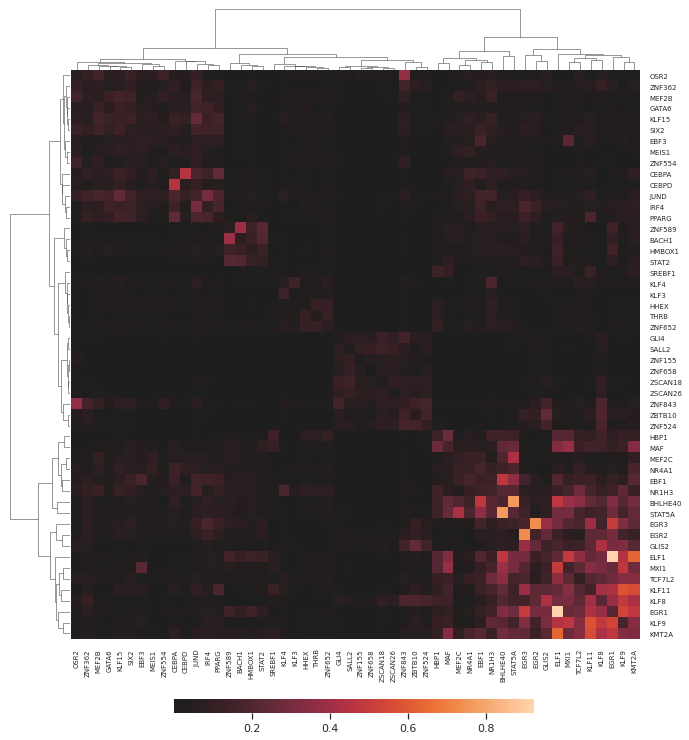

In [88]:
import scipy as sc
clust = sc.cluster.hierarchy.fclusterdata(avgMax, 0.05, criterion="distance", method="average")
pruned = avgMax[include, :]
pruned = pruned[:, include]
from itertools import compress
import seaborn as sns
import matplotlib.pylab as plt
sns.set(font_scale=1)
ax = sns.clustermap(pruned, method="ward", center=0, xticklabels=sigFeatures, yticklabels=sigFeatures, square=True, cbar_kws={'orientation': 'horizontal'}, dendrogram_ratio=0.10, cbar_pos = (0.25, 0, 0.5,0.02))
ax.ax_heatmap.set_xticklabels(ax.ax_heatmap.get_xmajorticklabels(), fontsize = 7)
ax.ax_heatmap.set_yticklabels(ax.ax_heatmap.get_ymajorticklabels(), fontsize = 7)
ax.ax_heatmap.tick_params(right=False, bottom=False)
plt.show()

In [90]:
sigFeatures = []
include = [False] * len(features)
for i in range(avg.shape[0]):
    for j in range(avg.shape[1]):
        if avg[i,j] > 0.01:
            include[i] = True
            sigFeatures.append(features[i])
            break
len(sigFeatures)

41

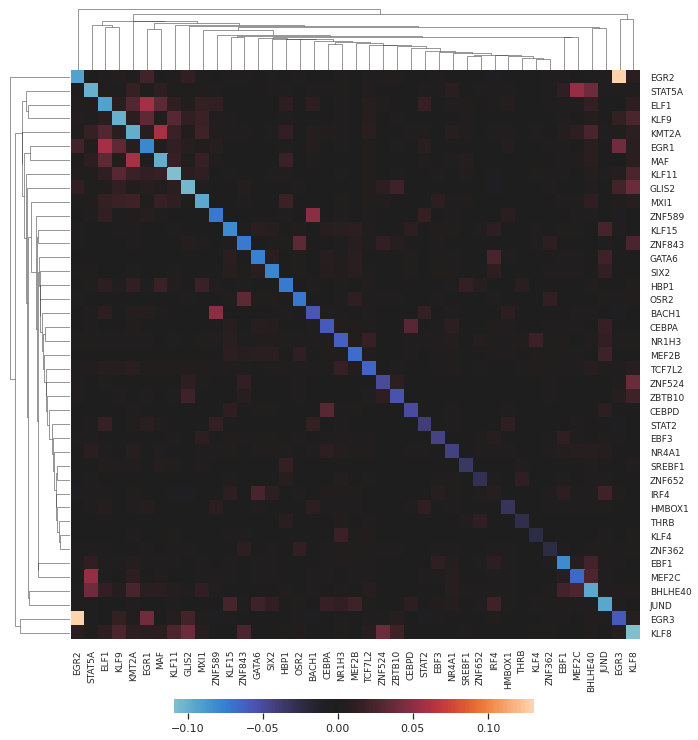

In [92]:
import scipy as sc
clust = sc.cluster.hierarchy.fclusterdata(avg, 0.3, criterion="distance", method="average")
pruned = avg[include, :]
pruned = pruned[:, include]
from itertools import compress
import seaborn as sns
import matplotlib.pylab as plt
sns.set(font_scale=1)
ax = sns.clustermap(pruned, method="ward", center=0, xticklabels=sigFeatures, yticklabels=sigFeatures, square=True, cbar_kws={'orientation': 'horizontal'}, dendrogram_ratio=0.10, cbar_pos = (0.25, 0, 0.5,0.02))
ax.ax_heatmap.set_xticklabels(ax.ax_heatmap.get_xmajorticklabels(), fontsize = 9)
ax.ax_heatmap.set_yticklabels(ax.ax_heatmap.get_ymajorticklabels(), fontsize = 9)
ax.ax_heatmap.tick_params(right=False, bottom=False)
plt.show()

34


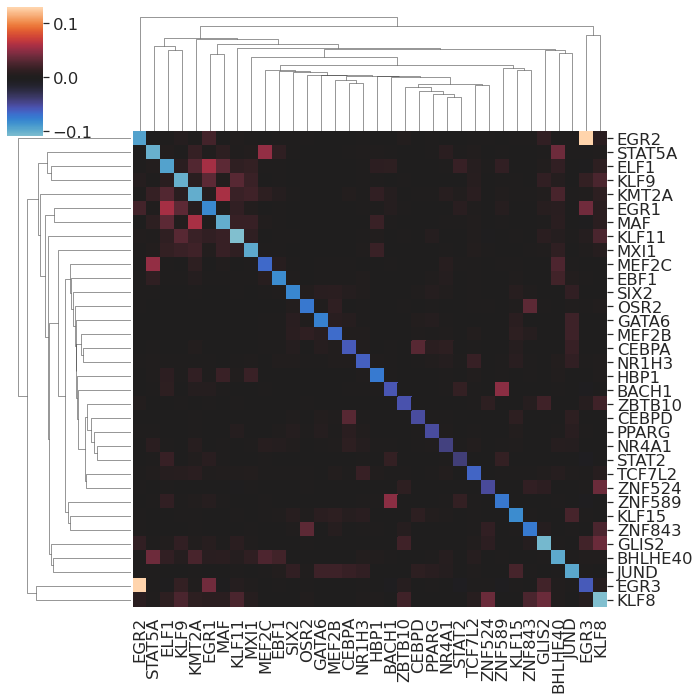

In [12]:
import scipy as sc
clust = sc.cluster.hierarchy.fclusterdata(avg, 0.05, criterion="distance", method="average")
pruned = avg[(clust!=1), :]
pruned = pruned[:, (clust!=1)]
from itertools import compress
pruned_features = list(compress(features, clust!=1))
print(len(pruned_features))
import seaborn as sns
import matplotlib.pylab as plt
sns.set(font_scale=1.5)
ax = sns.clustermap(pruned, method="ward", center=0, xticklabels=pruned_features, yticklabels=pruned_features, square=True)
plt.show()

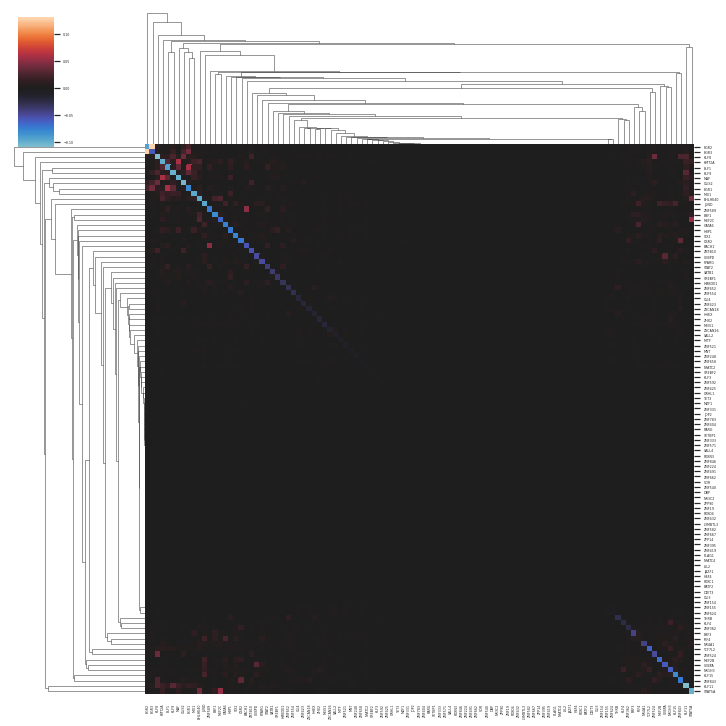

In [13]:
sns.set(font_scale=0.3)
ax = sns.clustermap(avg, method="ward", center=0, xticklabels=features, yticklabels=features, square=True)
plt.show()